In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv")
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [3]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [6]:
df = df.drop(['id','orbiting_body','name','sentry_object'],axis = 'columns')

In [7]:
df.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


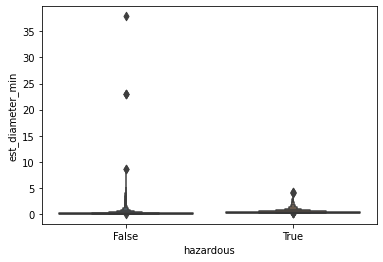

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxenplot(x='hazardous',y='est_diameter_min',data=df)
plt.show()

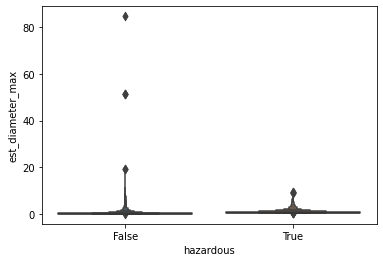

In [9]:
sns.boxenplot(x='hazardous',y='est_diameter_max',data=df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


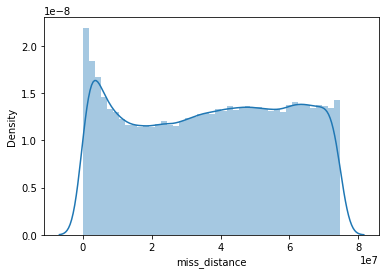

In [10]:
sns.distplot(df.miss_distance)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


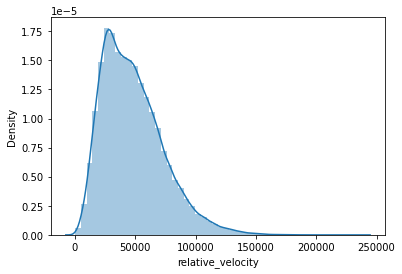

In [11]:
sns.distplot(df.relative_velocity)
plt.show()

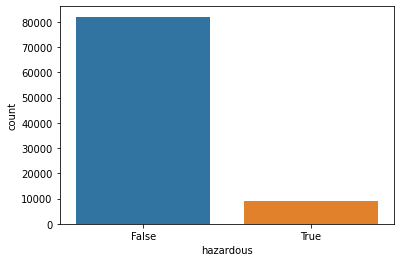

In [12]:
sns.countplot(x='hazardous',data=df)
plt.show()

In [13]:
df['est_diameter_avg']=(df.est_diameter_max+df.est_diameter_min)/2


In [14]:
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,est_diameter_avg
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,1.938843
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,0.430073
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,1.168268
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0.156150
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,0.412613
...,...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False,0.043007
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False,0.027136
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False,0.051706
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False,0.011845


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('hazardous', axis =1)
y = df.hazardous
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.feature_selection import chi2 
scores, pvalues = chi2(X, y) 
pvalues

array([0., 0., 0., 0., 0., 0.])

In [17]:
scores

array([2.13560124e+03, 4.77534955e+03, 4.41900556e+07, 2.19091335e+09,
       4.31447150e+03, 3.45547539e+03])

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

In [19]:
lr.score(X_test, y_test)

0.9048326728313518

In [20]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score, classification_report
def evaluate(y_test,y_pred):    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('F1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))

In [21]:
evaluate(y_test,y_pred)

Accuracy Score: 0.9048326728313518
F1_score: 0.0
Precision: 0.0
Recall: 0.0
Classification report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95     16439
        True       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: Undefine

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
model_tree=tree.fit(X_train,y_train)
y_pred_tree=model_tree.predict(X_test)

In [23]:
y_pred_tree

array([False, False, False, ..., False,  True, False])

In [24]:
evaluate(y_test,y_pred_tree)

Accuracy Score: 0.8913474240422721
F1_score: 0.45709570957095713
Precision: 0.4357629785002622
Recall: 0.48062463851937537
Classification report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94     16439
        True       0.44      0.48      0.46      1729

    accuracy                           0.89     18168
   macro avg       0.69      0.71      0.70     18168
weighted avg       0.90      0.89      0.89     18168



Hence, with Decision tree classifier, we see an increase in the recall, precision and f1-score.

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
y_pred_rf=rf.fit(X_train,y_train).predict(X_test)


In [26]:
y_pred_rf

array([False, False, False, ..., False,  True, False])

In [27]:
evaluate(y_test, y_pred_rf)

Accuracy Score: 0.9212901805372082
F1_score: 0.5239680426098535
Precision: 0.6172549019607844
Recall: 0.4551764025448236
Classification report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.96     16439
        True       0.62      0.46      0.52      1729

    accuracy                           0.92     18168
   macro avg       0.78      0.71      0.74     18168
weighted avg       0.91      0.92      0.92     18168



In [28]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

In [29]:
y_pred_knn

array([False, False, False, ..., False, False, False])

In [30]:
evaluate(y_test,y_pred_knn)#f1_score and recall both dropped for kNN

Accuracy Score: 0.8957507705856451
F1_score: 0.0715686274509804
Precision: 0.2347266881028939
Recall: 0.042220936957779065
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.94     16439
        True       0.23      0.04      0.07      1729

    accuracy                           0.90     18168
   macro avg       0.57      0.51      0.51     18168
weighted avg       0.84      0.90      0.86     18168



In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
y_pred_gnb

array([False, False, False, ..., False, False, False])

In [32]:
evaluate(y_test,y_pred_gnb)

Accuracy Score: 0.9010347864376926
F1_score: 0.07223942208462332
Precision: 0.3349282296650718
Recall: 0.04048582995951417
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95     16439
        True       0.33      0.04      0.07      1729

    accuracy                           0.90     18168
   macro avg       0.62      0.52      0.51     18168
weighted avg       0.85      0.90      0.86     18168



In [33]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
y_pred_xgbc=xgbc.fit(X_train,y_train).predict(X_test)



In [34]:
y_pred_xgbc

array([0, 0, 0, ..., 0, 1, 0])

In [35]:
evaluate(y_test,y_pred_xgbc)

Accuracy Score: 0.9183729634522237
F1_score: 0.3654257595207531
Precision: 0.7023026315789473
Recall: 0.24696356275303644
Classification report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96     16439
        True       0.70      0.25      0.37      1729

    accuracy                           0.92     18168
   macro avg       0.81      0.62      0.66     18168
weighted avg       0.90      0.92      0.90     18168



**So, we deduce that the best model among the above deployed models is random forest as we have a good f1 score and recall along with precision.**